# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city# YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) # YOUR CODE HERE
        weather_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']# YOUR CODE HERE
        city_lng = weather_json['coord']['lon'] # YOUR CODE HERE
        city_max_temp = weather_json['main']['temp_max'] # YOUR CODE HERE
        city_humidity = weather_json['main']['humidity'] # YOUR CODE HERE
        city_clouds = weather_json['clouds']['all'] # YOUR CODE HERE
        city_wind = weather_json['wind']['speed']  # YOUR CODE HERE
        city_country =weather_json['sys']['country'] # YOUR CODE HERE
        city_date = weather_json['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | takoradi
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | mozarlandia
Processing Record 10 of Set 1 | haapu
City not found. Skipping...
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | deputatskiy
Processing Record 20 of Set 1 | tiarei
Processing Record 21 of Set 1 | nelson bay
Processing Record 22 of Set 1 | lavrentiy

Processing Record 38 of Set 4 | kabala
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | yeletskiy
City not found. Skipping...
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | chicama
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | owosso
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | yeppoon
Processing Record 48 of Set 4 | uetze
Processing Record 49 of Set 4 | ibra
Processing Record 0 of Set 5 | isla vista
Processing Record 1 of Set 5 | acapulco
Processing Record 2 of Set 5 | yagodnoye
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | vung tau
Processing Record 6 of Set 5 | malwan
City not found. Skipping...
Processing Record 7 of Set 5 | saint stephen
Processing Record 8 of Set 5 | hoshangabad
Processing Record 9 of Set 5 | shakhtinsk
Processing Record 1

Processing Record 26 of Set 8 | tezu
Processing Record 27 of Set 8 | iquique
Processing Record 28 of Set 8 | wamba
Processing Record 29 of Set 8 | brooks
Processing Record 30 of Set 8 | mount isa
Processing Record 31 of Set 8 | kloulklubed
Processing Record 32 of Set 8 | inirida
Processing Record 33 of Set 8 | zyryanovsk
Processing Record 34 of Set 8 | srivardhan
Processing Record 35 of Set 8 | dourbali
Processing Record 36 of Set 8 | yomou
Processing Record 37 of Set 8 | amaigbo
Processing Record 38 of Set 8 | kigoma
Processing Record 39 of Set 8 | uinskoye
Processing Record 40 of Set 8 | potiskum
Processing Record 41 of Set 8 | kailua
Processing Record 42 of Set 8 | kansanshi
Processing Record 43 of Set 8 | cohoes
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | bisho
Processing Record 46 of Set 8 | aykhal
Processing Record 47 of Set 8 | mwaro
Processing Record 48 of Set 8 | catuday
Processing Record 49 of Set 8 | tura
Processing Record 0 of Set 9 | luwuk
Proce

Processing Record 16 of Set 12 | haifa
Processing Record 17 of Set 12 | moree
Processing Record 18 of Set 12 | jiroft
City not found. Skipping...
Processing Record 19 of Set 12 | sitio novo do tocantins
Processing Record 20 of Set 12 | tadine
Processing Record 21 of Set 12 | liling
Processing Record 22 of Set 12 | jequitinhonha
Processing Record 23 of Set 12 | los llanos de aridane
Processing Record 24 of Set 12 | usinsk
Processing Record 25 of Set 12 | nacala
Processing Record 26 of Set 12 | vaxjo
Processing Record 27 of Set 12 | atka
City not found. Skipping...
Processing Record 28 of Set 12 | veraval
Processing Record 29 of Set 12 | voi
Processing Record 30 of Set 12 | gafargaon
Processing Record 31 of Set 12 | geresk
City not found. Skipping...
Processing Record 32 of Set 12 | ashington
Processing Record 33 of Set 12 | koulikoro
Processing Record 34 of Set 12 | kyshtovka
Processing Record 35 of Set 12 | tarudant
City not found. Skipping...
Processing Record 36 of Set 12 | sataua
Ci

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,283.23,62,98,1.77,CL,1685956034
1,tasiilaq,65.6145,-37.6368,274.24,90,100,0.74,GL,1685956035
2,dikson,73.5069,80.5464,274.55,76,42,3.02,RU,1685956035
3,hithadhoo,-0.6000,73.0833,301.45,71,100,1.50,MV,1685956035
4,takoradi,4.8845,-1.7554,300.01,83,100,2.70,GH,1685956035


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,283.23,62,98,1.77,CL,1685956034
1,tasiilaq,65.6145,-37.6368,274.24,90,100,0.74,GL,1685956035
2,dikson,73.5069,80.5464,274.55,76,42,3.02,RU,1685956035
3,hithadhoo,-0.6000,73.0833,301.45,71,100,1.50,MV,1685956035
4,takoradi,4.8845,-1.7554,300.01,83,100,2.70,GH,1685956035


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

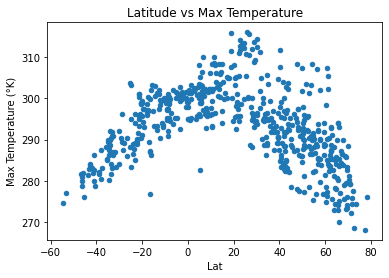

In [17]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Max Temp")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Max Temperature (°K)")
plt.title("Latitude vs Max Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

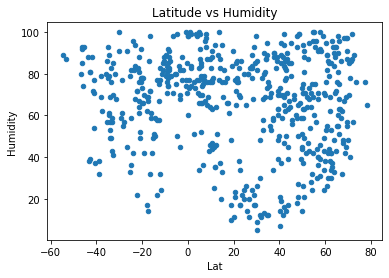

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

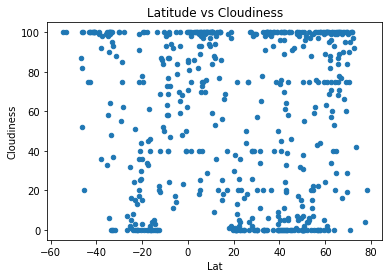

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

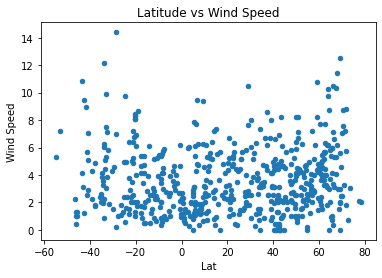

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot.scatter(x="Lat", y="Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x, y):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Generate predictions using the linear regression line
    y_pred = intercept + slope * x

    # Plot the data points and the regression line
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, y_pred, color='red', label='Linear Regression')

    # Set the labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression')

    # Display the legend and plot
    plt.legend()
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0].copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tasiilaq,65.6145,-37.6368,274.24,90,100,0.74,GL,1685956035
2,dikson,73.5069,80.5464,274.55,76,42,3.02,RU,1685956035
4,takoradi,4.8845,-1.7554,300.01,83,100,2.70,GH,1685956035
5,jamestown,42.0970,-79.2353,282.95,69,0,2.57,US,1685956035
9,chokurdakh,70.6333,147.9167,279.31,40,0,7.60,RU,1685956037


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0].copy()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,283.23,62,98,1.77,CL,1685956034
3,hithadhoo,-0.6000,73.0833,301.45,71,100,1.50,MV,1685956035
6,punta arenas,-53.1500,-70.9167,277.21,87,100,7.20,CL,1685956036
7,mataura,-46.1927,168.8643,278.80,93,82,0.42,NZ,1685956036
8,mozarlandia,-14.7447,-50.5706,293.35,51,5,2.21,BR,1685956036


###  Temperature vs. Latitude Linear Regression Plot

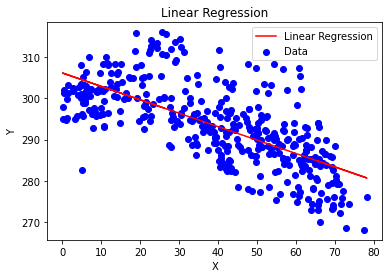

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

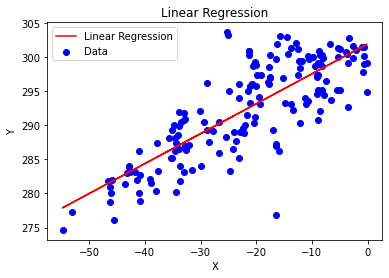

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** The farther away from the equator you get, the lower the temperature gets. 

### Humidity vs. Latitude Linear Regression Plot

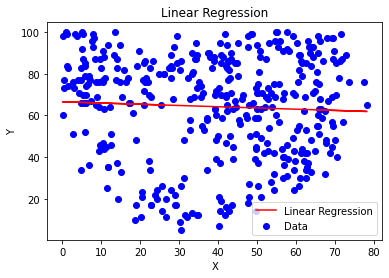

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

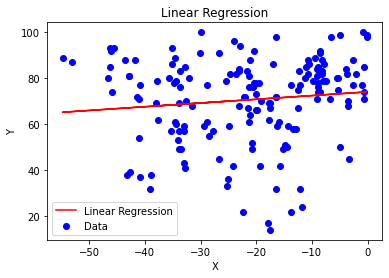

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There is no bearing on the equator when it comes to humidity

### Cloudiness vs. Latitude Linear Regression Plot

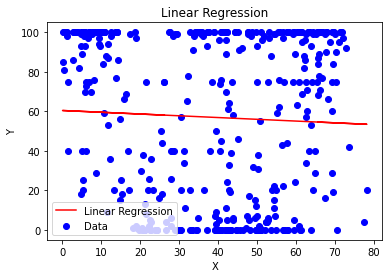

In [29]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

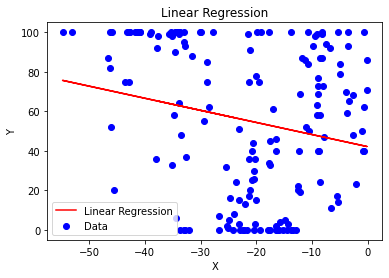

In [30]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** There is no relationship between distance from the equator and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

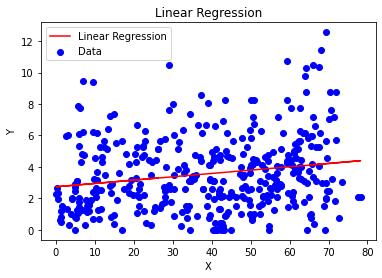

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

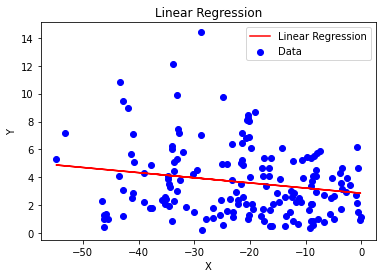

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** There is no relationship. 